In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("heart_2022_with_nans.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


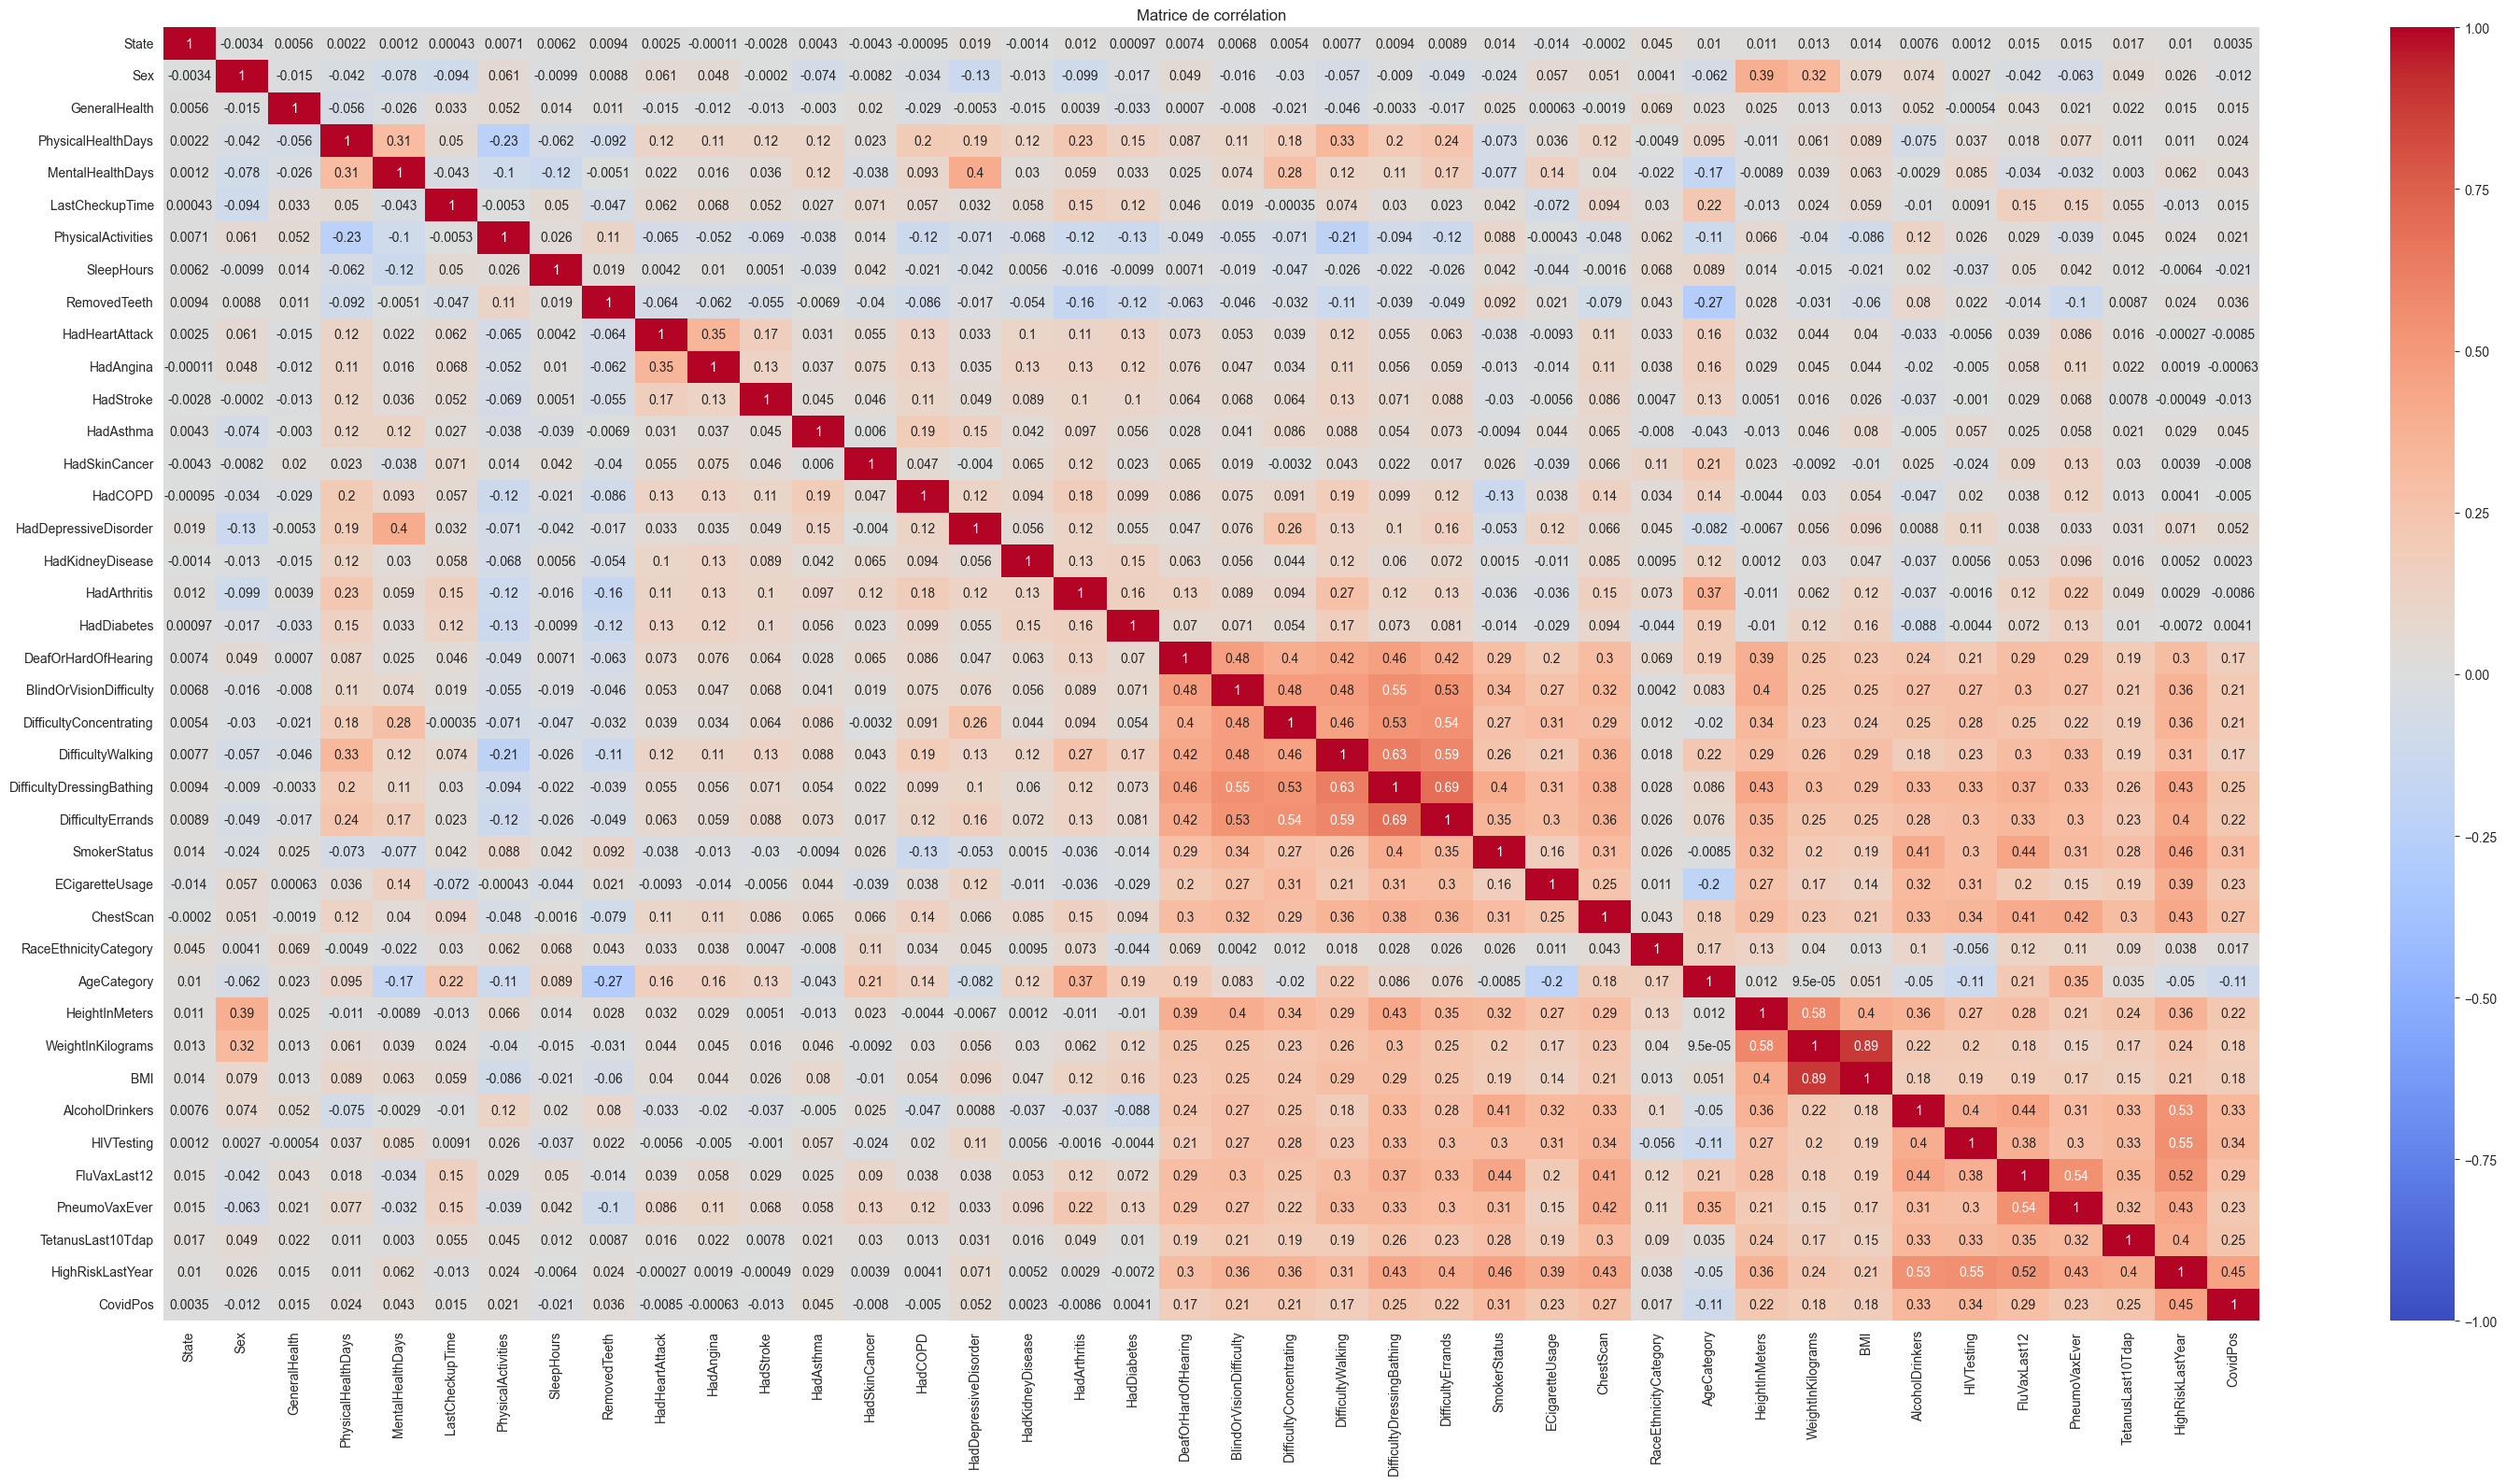

In [3]:
categorical_columns = []
for c in df.columns:
    categorical_columns.append(c)

for col in categorical_columns:
    df[col] = pd.Categorical(df[col]).codes

numeric_columns = df.select_dtypes(include=[np.number]).columns

corr_matrix = df[numeric_columns].corr()

# Création du heatmap
plt.figure(figsize=(30, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()


<h1>Hypothèse : </br>
-Les hommes qui effectuent régulièrement des activités physiques ont moins de crise cardiaque que les femmes</h1>



HadHeartAttack      No    Yes
Sex                          
Female          224828   9691
Male            192131  15417


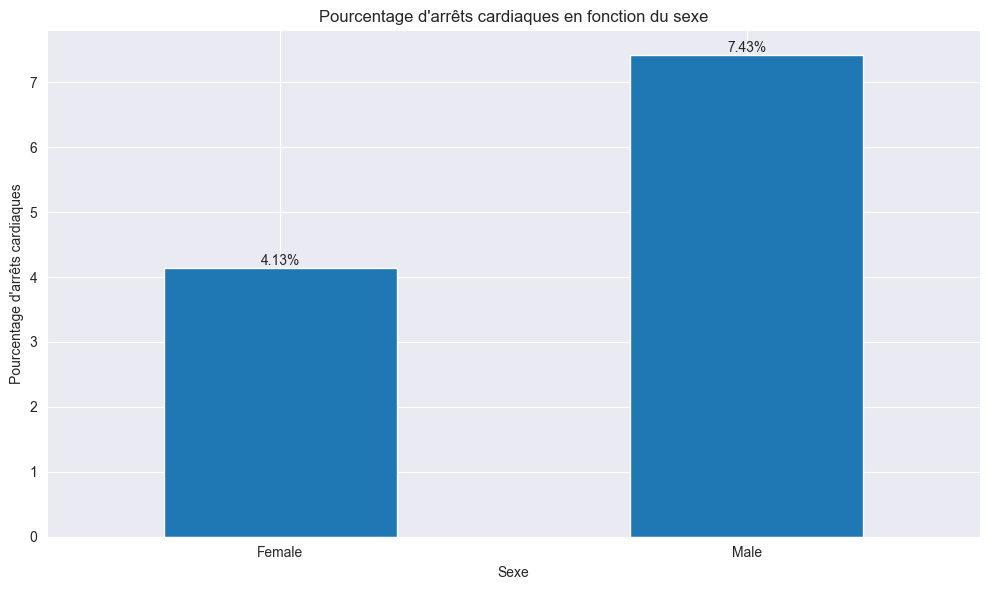

In [12]:
df = pd.read_csv("heart_2022_with_nans.csv")

result = df.groupby('Sex')['HadHeartAttack'].value_counts(normalize=True).unstack()
print(df.groupby('Sex')['HadHeartAttack'].value_counts().unstack())
result = result['Yes'] * 100

plt.figure(figsize=(10, 6))
result.plot(kind='bar')
plt.title('Pourcentage d\'arrêts cardiaques en fonction du sexe')
plt.xlabel('Sexe')
plt.ylabel('Pourcentage d\'arrêts cardiaques')
plt.xticks(rotation=0)

for i, v in enumerate(result):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

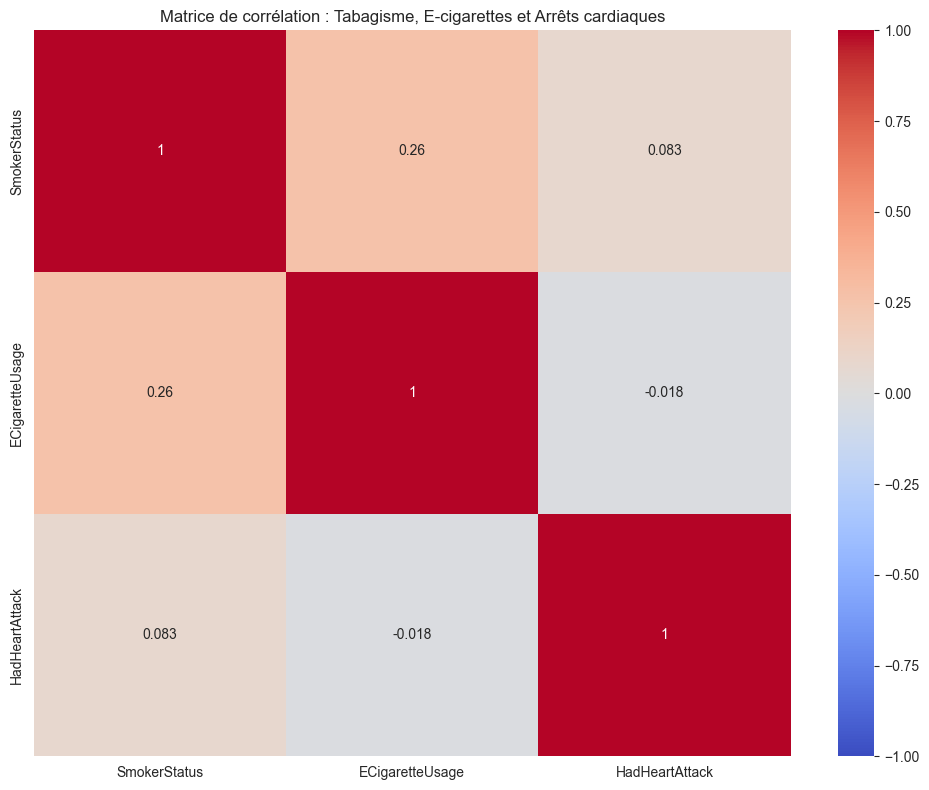

In [10]:

df = pd.read_csv("heart_2022_with_nans.csv")
df['HadHeartAttack'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

smoker_status_mapping = {
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes some days': 2,
    'Current smoker - now smokes every day': 3
}
df['SmokerStatus'] = df['SmokerStatus'].map(smoker_status_mapping)

ecigarette_usage_mapping = {
    'Never used e-cigarettes in my entire life': 0,
    'Not at all (right now)': 1,
    'Use them some days': 2,
    'Use them every day': 3
}
df['ECigaretteUsage'] = df['ECigaretteUsage'].map(ecigarette_usage_mapping)

columns_for_correlation = ['SmokerStatus', 'ECigaretteUsage', 'HadHeartAttack']
correlation_matrix = df[columns_for_correlation].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matrice de corrélation : Tabagisme, E-cigarettes et Arrêts cardiaques')
plt.tight_layout()
plt.show()


HadHeartAttack                             No   Yes
SmokerStatus                                       
Current smoker - now smokes every day   32504  3178
Current smoker - now smokes some days   12844   978
Former smoker                          103246  9763
Never smoked                           235308  9305
HadHeartAttack                                 No    Yes
ECigaretteUsage                                         
Never used e-cigarettes in my entire life  292103  18030
Not at all (right now)                      70479   4328
Use them every day                          10003    324
Use them some days                          11200    457


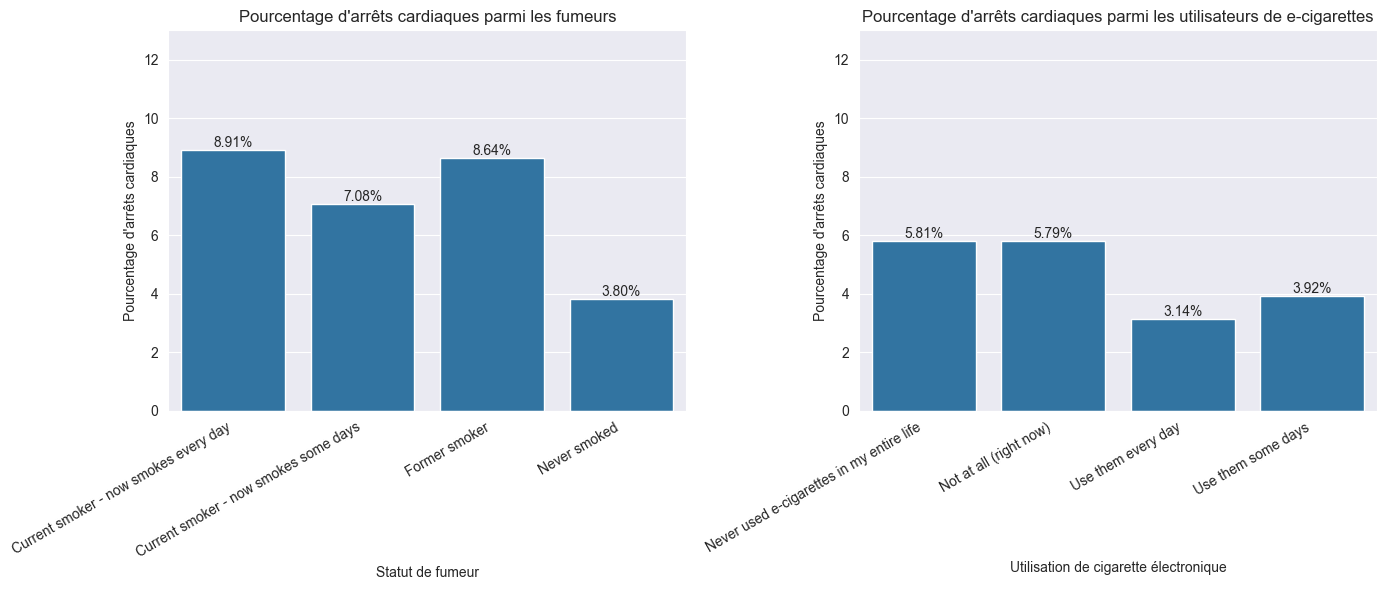

In [26]:
df = pd.read_csv("heart_2022_with_nans.csv")

#Calcul pour les colonnes SmokerStatus et ECigaretteUsage ramené sur 1 pour chaque label et multiplié par 100 pour avoir un pourcentage
def calculate_heart_attack_percentage_within_group(data, group_column, target_column):
    grouped = data.groupby(group_column)[target_column].value_counts(normalize=True).unstack()
    print(data.groupby(group_column)[target_column].value_counts().unstack())
    return (grouped['Yes'] * 100).reset_index()

smoking_data = calculate_heart_attack_percentage_within_group(df, 'SmokerStatus', 'HadHeartAttack')
ecigarette_data = calculate_heart_attack_percentage_within_group(df, 'ECigaretteUsage', 'HadHeartAttack')

plt.figure(figsize=(14, 6))

#Tabac
ax1 = plt.subplot(121)
sns.barplot(x='SmokerStatus', y='Yes', data=smoking_data, ax=ax1)
ax1.set_title('Pourcentage d\'arrêts cardiaques parmi les fumeurs')
ax1.set_xlabel('Statut de fumeur')
ax1.set_ylabel('Pourcentage d\'arrêts cardiaques')
ax1.set_ylim(0, 13)
plt.xticks(rotation=30, ha='right')

#Cigarette électronique
ax2 = plt.subplot(122)
sns.barplot(x='ECigaretteUsage', y='Yes', data=ecigarette_data, ax=ax2)
ax2.set_title('Pourcentage d\'arrêts cardiaques parmi les utilisateurs de e-cigarettes')
ax2.set_xlabel('Utilisation de cigarette électronique')
ax2.set_ylabel('Pourcentage d\'arrêts cardiaques')
ax2.set_ylim(0, 13)
plt.xticks(rotation=30, ha='right')

for ax in [ax1, ax2]:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%')

plt.tight_layout()
plt.show()


Grouped data for SmokerStatus:
HadHeartAttack                             No   Yes
SmokerStatus                                       
Current smoker - now smokes every day   15262  1700
Current smoker - now smokes some days    6055   586
Former smoker                           70941  7416
Never smoked                           197973  8221
Grouped data for ECigaretteUsage:
HadHeartAttack                                 No   Yes
ECigaretteUsage                                        
Never used e-cigarettes in my entire life  197973  8221
Not at all (right now)                      29654   940
Use them every day                           2347    24
Use them some days                           3830    45


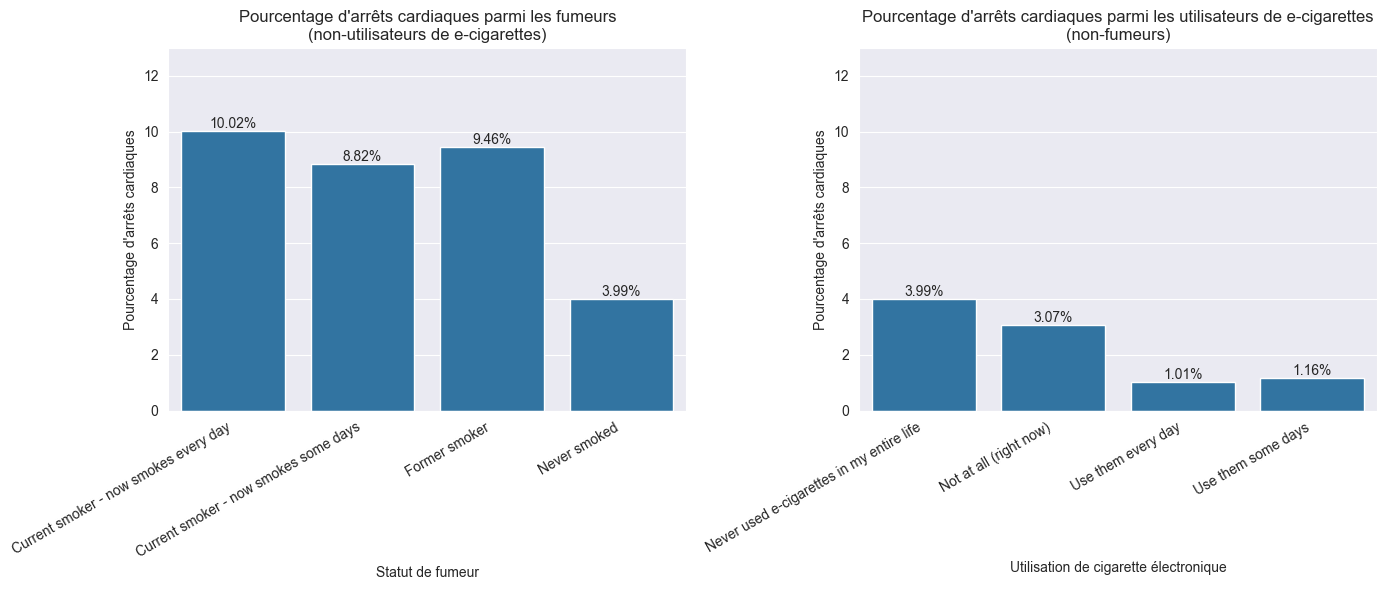

In [25]:
df = pd.read_csv("heart_2022_with_nans.csv")

def calculate_heart_attack_percentage_within_group(data, group_column, target_column, filter_column=None, filter_values=None):
    if filter_column and filter_values:
        data = data[data[filter_column].isin(filter_values)]

    grouped = data.groupby(group_column)[target_column].value_counts(normalize=True).unstack()
    print(f"Grouped data for {group_column}:")
    print(data.groupby(group_column)[target_column].value_counts().unstack())
    return (grouped['Yes'] * 100).reset_index()

# Filtrer les données pour les fumeurs qui n'utilisent pas de cigarette électronique
smoking_data = calculate_heart_attack_percentage_within_group(
    df, 'SmokerStatus', 'HadHeartAttack',
    'ECigaretteUsage', ['Never used e-cigarettes in my entire life',]
)
# Filtrer les données pour les utilisateurs de cigarette électronique qui n'ont jamais fumé
ecigarette_data = calculate_heart_attack_percentage_within_group(
    df, 'ECigaretteUsage', 'HadHeartAttack',
    'SmokerStatus', ['Never smoked']
)

plt.figure(figsize=(14, 6))

# Tabac
ax1 = plt.subplot(121)
sns.barplot(x='SmokerStatus', y='Yes', data=smoking_data, ax=ax1)
ax1.set_title('Pourcentage d\'arrêts cardiaques parmi les fumeurs\n(non-utilisateurs de e-cigarettes)')
ax1.set_xlabel('Statut de fumeur')
ax1.set_ylabel('Pourcentage d\'arrêts cardiaques')
ax1.set_ylim(0, 13)
plt.xticks(rotation=30, ha='right')

# Cigarette électronique
ax2 = plt.subplot(122)
sns.barplot(x='ECigaretteUsage', y='Yes', data=ecigarette_data, ax=ax2)
ax2.set_title('Pourcentage d\'arrêts cardiaques parmi les utilisateurs de e-cigarettes\n(non-fumeurs)')
ax2.set_xlabel('Utilisation de cigarette électronique')
ax2.set_ylabel('Pourcentage d\'arrêts cardiaques')
ax2.set_ylim(0, 13)
plt.xticks(rotation=30, ha='right')

for ax in [ax1, ax2]:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%')

plt.tight_layout()
plt.show()


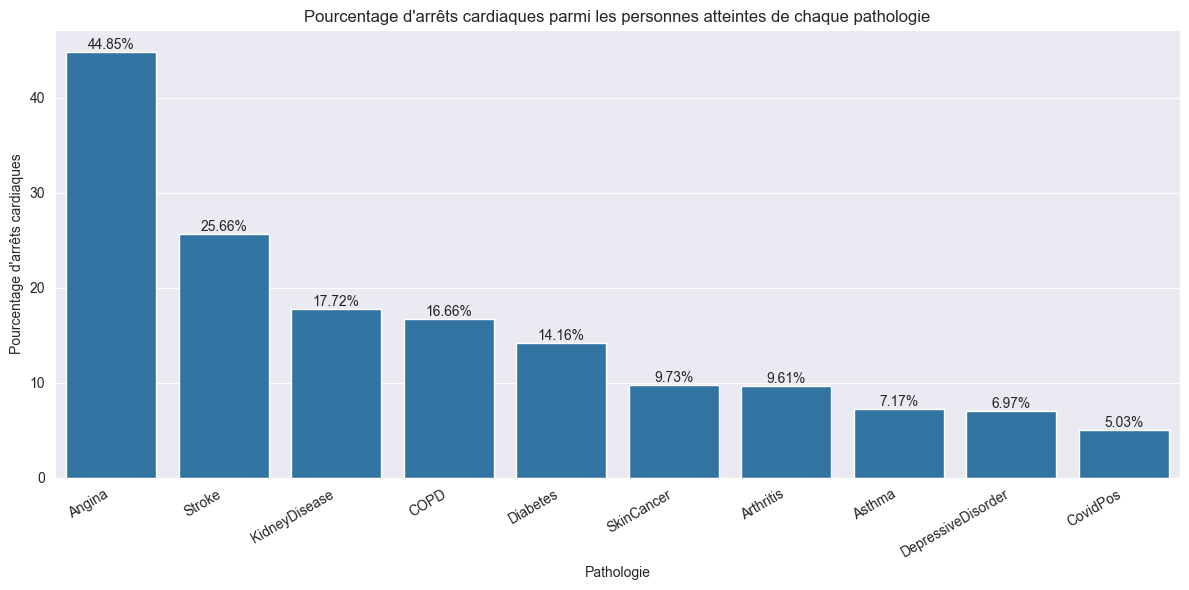

In [24]:
df = pd.read_csv("heart_2022_with_nans.csv")

pathologies = ['HadDepressiveDisorder','HadDiabetes', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD', 'HadKidneyDisease', 'HadArthritis','HadSkinCancer',"CovidPos"]

def calculate_heart_attack_percentage(data, condition):
    condition_data = data[data[condition] == 'Yes']
    total = len(condition_data)
    heart_attacks = len(condition_data[condition_data['HadHeartAttack'] == 'Yes'])
    return (heart_attacks / total) * 100 if total > 0 else 0

percentages = [calculate_heart_attack_percentage(df, path) for path in pathologies]

plot_data = pd.DataFrame({
    'Pathologie': [path.replace('Had', '') for path in pathologies],
    'Pourcentage d\'arrêts cardiaques': percentages
})

plot_data = plot_data.sort_values('Pourcentage d\'arrêts cardiaques', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Pathologie', y='Pourcentage d\'arrêts cardiaques', data=plot_data)
plt.title('Pourcentage d\'arrêts cardiaques parmi les personnes atteintes de chaque pathologie')
plt.xlabel('Pathologie')
plt.ylabel('Pourcentage d\'arrêts cardiaques')
plt.xticks(rotation=30, ha='right')

for i, v in enumerate(plot_data['Pourcentage d\'arrêts cardiaques']):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

